# DSN AI HACKATON PRE-BOOT CONTEST 2021


### Name: OKAMKPA TOBECHUKWU GAMALIEL
### School: University of Nigeria Nsukka (UNN)

In [1]:
#import necessary Libaries
import numpy as np;import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler,SMOTE,SMOTENC
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,f1_score,classification_report
from sklearn.model_selection import cross_val_predict,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier#import necessary Libaries

In [2]:
train_data=pd.read_csv(r'C:\Users\user\Documents\Train.csv',na_values='NULL')
test_data=pd.read_csv(r"C:\Users\user\Documents\Test.csv",na_values='NULL')
train_data.head(5)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0


In [3]:
train_data.shape

(1568, 27)

In [4]:
train_data.Response.value_counts()

0    1329
1     239
Name: Response, dtype: int64

In [5]:
#Checking for missing values 
test_data.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [6]:
y_train=train_data.Response


In [7]:
train_data.drop(['Response'],axis=1,inplace=True)

In [8]:
data=train_data.append(test_data)
data.drop('ID',axis=1,inplace=True)

In [9]:
data.tail(10)

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
662,1957,PhD,Single,65997.6,0,1,10-03-2013,10,5,4,...,39,30,8,4,0,0,0,0,0,0
663,1969,Graduation,Married,49344.0,1,1,06-11-2013,87,3,2,...,0,8,24,6,0,0,0,0,0,0
664,1957,Master,Together,65523.6,1,1,09-07-2013,92,6,4,...,17,2,4,7,0,0,0,0,0,0
665,1956,Graduation,Together,78897.6,0,1,15-04-2013,65,2,2,...,95,78,34,1,0,0,0,0,0,1
666,1960,Graduation,Single,60796.8,1,1,16-01-2013,71,9,8,...,6,4,126,9,0,0,0,0,0,0
667,1975,Graduation,Married,80934.0,0,1,12-08-2012,70,5,9,...,29,80,11,6,0,0,0,0,0,0
668,1955,Graduation,Divorced,84052.8,0,1,18-02-2013,53,4,7,...,153,14,14,5,0,0,0,0,0,0
669,1952,PhD,Married,63974.4,0,0,09-08-2013,39,1,5,...,0,0,25,7,0,0,0,0,0,0
670,1960,Graduation,Together,69548.4,0,1,19-08-2013,31,7,4,...,77,5,29,3,0,0,0,0,0,1
671,1961,Master,Married,56823.6,0,1,13-11-2013,100,3,2,...,8,8,4,5,0,0,0,0,0,0


In [10]:
#Checking for Null Values
data.isnull().sum()

Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          24
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
dtype: int64

In [11]:
data[data.Disposable_Income.isnull()]

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
128,1970,Master,Together,NaN,1,1,18-05-2013,59,7,4,...,94,66,96,3,0,0,0,0,0,0
155,1960,PhD,Single,NaN,0,0,05-11-2013,87,1,1,...,3,2,39,2,0,0,0,0,0,0
166,1979,2n Cycle,Together,NaN,0,0,12-08-2012,60,0,0,...,12,4,22,0,0,1,0,0,0,0
288,1983,Graduation,Single,NaN,1,0,17-06-2013,64,2,2,...,2,2,6,6,0,0,0,0,0,0
423,1990,Graduation,Married,NaN,0,0,03-06-2013,76,1,6,...,60,30,61,3,0,1,0,1,0,0
462,1984,Graduation,Married,NaN,1,0,15-11-2013,18,1,1,...,0,2,1,7,0,0,0,0,0,0
552,1971,Graduation,Single,NaN,1,2,23-08-2013,74,6,2,...,52,50,20,7,0,1,0,1,0,0
562,1955,Master,Together,NaN,0,1,23-06-2013,90,2,4,...,0,0,24,6,0,0,0,0,0,0
588,1973,PhD,Together,NaN,1,0,02-03-2014,24,1,1,...,0,0,3,7,0,0,0,0,0,0
642,1987,Graduation,Single,NaN,1,0,20-02-2013,26,0,27,...,3,263,362,1,0,0,0,0,0,0


In [12]:
#Changing the Dtype of Date_Customer
data.Date_Customer=pd.to_datetime(data.Date_Customer)
for x in data.columns:
    print(x,': ',data[x].dtype)
    print()

Year_of_Birth :  int64

Education_Level :  object

Marital_Status :  object

Disposable_Income :  float64

No_of_Kids_in_home :  int64

No_of_Teen_in_home :  int64

Date_Customer :  datetime64[ns]

Recency :  int64

Discounted_Purchases :  int64

WebPurchases :  int64

CatalogPurchases :  int64

StorePurchases :  int64

Amount_on_Wines :  int64

Amount_on_Fruits :  int64

Amount_on_MeatProducts :  int64

Amount_on_FishProducts :  int64

Amount_on_SweetProducts :  int64

Amount_on_GoldProds :  int64

WebVisitsMonth :  int64

Cmp3Accepted :  int64

Cmp4Accepted :  int64

Cmp5Accepted :  int64

Cmp1Accepted :  int64

Cmp2Accepted :  int64

Any_Complain :  int64



In [13]:
data.Date_Customer=(round((data.Date_Customer.dt.day/365),3)+round((data.Date_Customer.dt.month/12),3)+data.Date_Customer.dt.year)
data.Date_Customer=data.Date_Customer-data.Date_Customer.min()
data.head(10)

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,1955,Graduation,Divorced,77504.4,1,1,2.455,56,2,1,...,0,6,20,3,0,0,0,0,0,0
1,1958,Graduation,Together,56784.0,0,1,1.000,17,6,5,...,50,15,19,6,0,0,0,0,0,0
2,1962,Graduation,Single,103714.8,0,0,1.870,17,0,7,...,29,18,37,2,0,0,0,1,0,0
3,1979,2n Cycle,Single,46311.6,1,0,1.681,49,3,4,...,17,24,24,8,0,0,0,0,0,0
4,1959,Graduation,Married,87486.0,0,0,2.036,59,1,3,...,181,165,203,1,0,0,0,1,0,0
5,1960,Master,Married,41090.4,0,1,2.208,32,1,0,...,0,0,1,5,0,0,0,0,0,0
6,1953,Graduation,Single,86673.6,0,0,0.886,94,1,6,...,30,14,56,3,0,0,0,0,0,0
7,1974,Graduation,Together,88711.2,0,0,1.070,61,1,6,...,159,91,15,3,0,0,0,0,0,0
8,1966,Graduation,Together,35606.4,1,1,1.903,13,1,0,...,0,4,8,6,0,0,0,0,0,0
9,1975,Graduation,Married,41305.2,1,0,0.997,88,1,1,...,6,2,9,7,0,0,0,0,0,0


In [14]:
# Selecting Object Type Data
obj_data=data.select_dtypes('object')
obj_data

,Education_Level,Marital_Status
0,Graduation,Divorced
1,Graduation,Together
2,Graduation,Single
3,2n Cycle,Single
4,Graduation,Married
...,...,...
667,Graduation,Married
668,Graduation,Divorced
669,PhD,Married
670,Graduation,Together


In [15]:
for col in obj_data.columns:
    print(obj_data[col].value_counts().sort_values(ascending=False))
    print()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education_Level, dtype: int64

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64



In [16]:
# Manual Encoding of Marital Status
data.Marital_Status.replace(['Alone','YOLO','Absurd','Single','Divorced','Widow','Together','Married'],[0,0,0,0,1,2,3,4],inplace=True)

In [17]:
# Merging and Encoding Educational_Level
data.Education_Level=data.Education_Level.replace('2n Cycle','Master')
data.Education_Level=data.Education_Level.replace(['Basic','Master','Graduation','PhD'],[1,3,2,4])
data.head(5)

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,1955,2,1,77504.4,1,1,2.455,56,2,1,...,0,6,20,3,0,0,0,0,0,0
1,1958,2,3,56784.0,0,1,1.000,17,6,5,...,50,15,19,6,0,0,0,0,0,0
2,1962,2,0,103714.8,0,0,1.870,17,0,7,...,29,18,37,2,0,0,0,1,0,0
3,1979,3,0,46311.6,1,0,1.681,49,3,4,...,17,24,24,8,0,0,0,0,0,0
4,1959,2,4,87486.0,0,0,2.036,59,1,3,...,181,165,203,1,0,0,0,1,0,0


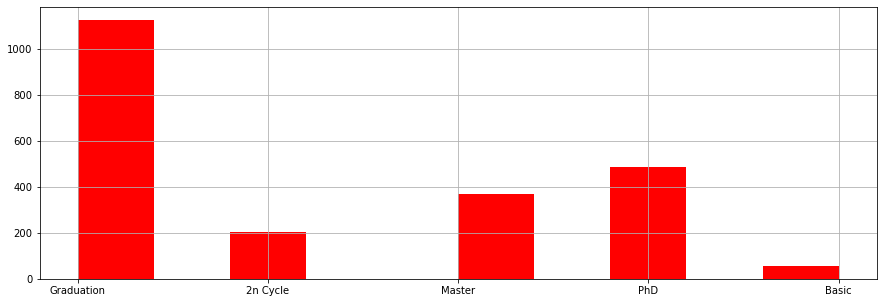

In [18]:
plt.figure(figsize=(15,5))
plt.hist(obj_data['Education_Level'],color='r')
plt.grid(True)

count      2216.000000
mean      62696.701625
std       30207.691993
min        2076.000000
25%       42363.600000
50%       61657.800000
75%       82226.400000
max      799999.200000
Name: Disposable_Income, dtype: float64


(-37820.16, 200000.0, 0.0, 194.25)

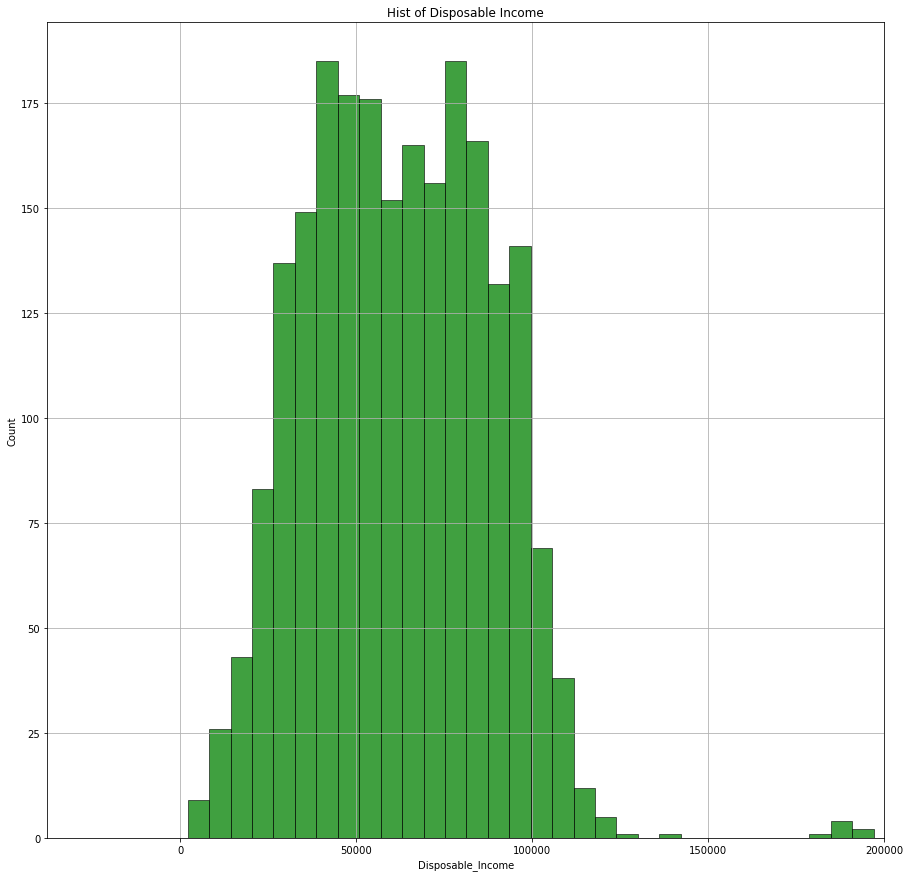

In [19]:
# Disposable Income
print(data.Disposable_Income.describe())
plt.figure(figsize=(15,15))
plt.grid('True')
plt.title('Hist of Disposable Income')
sns.histplot(data.Disposable_Income,color='g')
plt.grid(True)
plt.axis(xmax=200000)

In [20]:
#Filling Missing Values in Disposable With Mean
data.Disposable_Income.fillna(data.Disposable_Income.mean(),inplace=True)
# Feature Column adiition
data['Disposable_Income_Bin']=pd.cut(data.Disposable_Income,[25000,50000,1000000])
data['Disposable_Income_Bin']=data['Disposable_Income_Bin'].astype('category')
data['Disposable_Income_Bin']=data['Disposable_Income_Bin'].cat.codes
#Converting Age of Birth To Age 
data.Year_of_Birth=2021-data.Year_of_Birth
data.head(5)

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Disposable_Income_Bin
0,66,2,1,77504.4,1,1,2.455,56,2,1,...,6,20,3,0,0,0,0,0,0,1
1,63,2,3,56784.0,0,1,1.000,17,6,5,...,15,19,6,0,0,0,0,0,0,1
2,59,2,0,103714.8,0,0,1.870,17,0,7,...,18,37,2,0,0,0,1,0,0,1
3,42,3,0,46311.6,1,0,1.681,49,3,4,...,24,24,8,0,0,0,0,0,0,0
4,62,2,4,87486.0,0,0,2.036,59,1,3,...,165,203,1,0,0,0,1,0,0,1


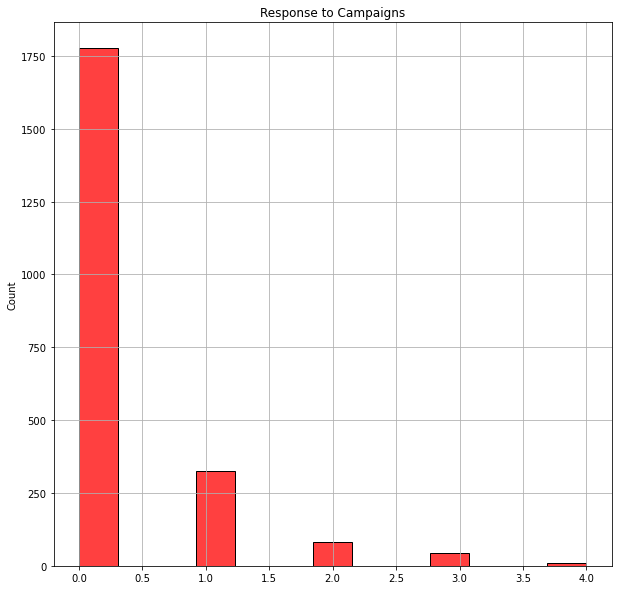

In [21]:
#SElecting Campaign Columns
data_cmd=pd.DataFrame()
for col in data.columns:
    if col[:2] in 'Cm':
        data_cmd[col]=data[col]
data_cmd.sort_index(axis=1)
plt.figure(figsize=(10,10))
plt.title('Response to Campaigns')
sns.histplot(data_cmd.sum(axis=1),color='r')
plt.grid(True)

 From The Chart Above: The Number of Person Who have never Responded to Any Campaigns is considerable high compared with others

In [22]:
cmd_list=[]
for value in data_cmd.sum(axis=1):
    if value!=0:
        cmd_list.append(1)
    else:
        cmd_list.append(0)
print('Length of Cmd_List: ',len(cmd_list))
data['Cmd_Total']=cmd_list
data.head(5)

Length of Cmd_List:  2240


,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Disposable_Income_Bin,Cmd_Total
0,66,2,1,77504.4,1,1,2.455,56,2,1,...,20,3,0,0,0,0,0,0,1,0
1,63,2,3,56784.0,0,1,1.000,17,6,5,...,19,6,0,0,0,0,0,0,1,0
2,59,2,0,103714.8,0,0,1.870,17,0,7,...,37,2,0,0,0,1,0,0,1,1
3,42,3,0,46311.6,1,0,1.681,49,3,4,...,24,8,0,0,0,0,0,0,0,0
4,62,2,4,87486.0,0,0,2.036,59,1,3,...,203,1,0,0,0,1,0,0,1,1


<AxesSubplot:xlabel='Total_Amt', ylabel='Count'>

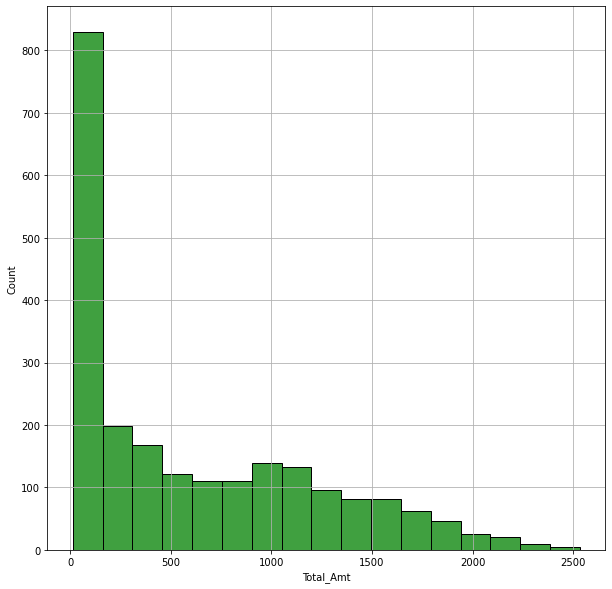

In [23]:
#SElecting Amount Columns
data_Amt=pd.DataFrame()
for col in data.columns:
    if col[:2] in 'Am':
        data_Amt[col]=data[col]
data_Amt=data_Amt.sum(axis=1)
data['Total_Amt']=data_Amt
plt.figure(figsize=(10,10))
plt.grid(True)
sns.histplot(data.Total_Amt,color='g')


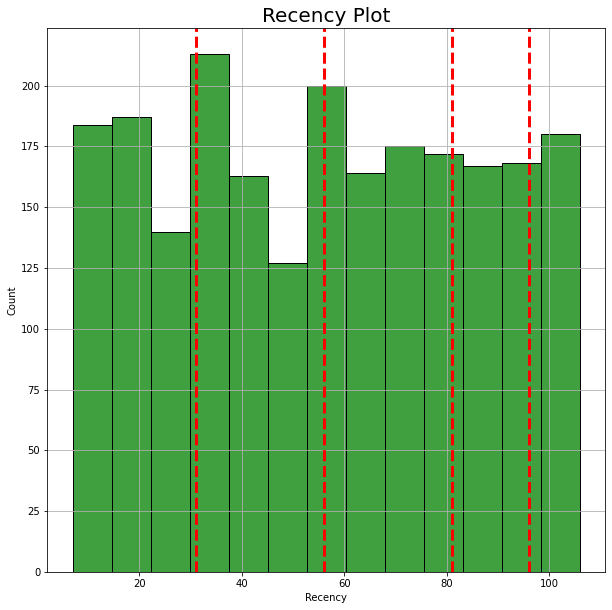

In [24]:
# Recency
plt.figure(figsize=(10,10))
plt.grid(True)
plt.title('Recency Plot',size=20)
sns.histplot(data.Recency,color='g')
for x in [0.25,0.50,0.75,0.90]:
    plt.axvline(data.Recency.quantile(x),color='r',lw=3,ls='--')


Explained Variance Ratio for PCA:  [9.99645218e-01 3.07566101e-04]


(-5000.0, 4000.0)

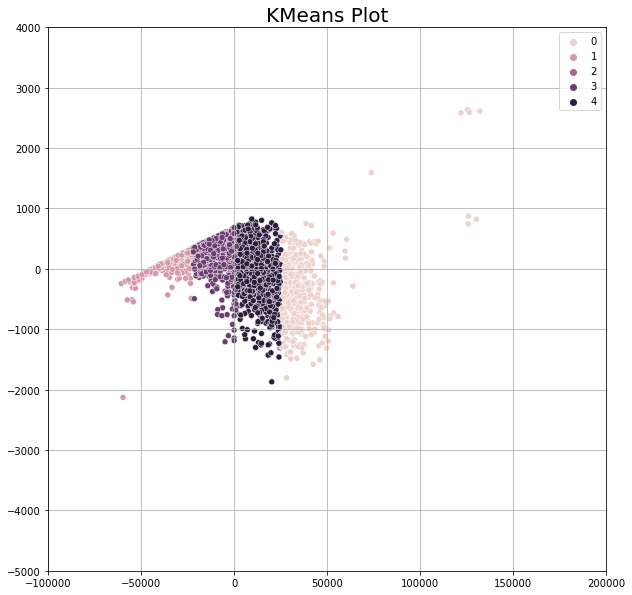

In [25]:
np.random.seed(42)
#PCA
pca=PCA(n_components=2,random_state=42)
pca.fit(data.values)
print('Explained Variance Ratio for PCA: ',pca.explained_variance_ratio_)
z=pca.transform(data.values)
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(data.values)
plt.figure(figsize=(10,10))
plt.grid(True)
plt.title('KMeans Plot',size=20)
sns.scatterplot(x=z[:,0],y=z[:,1],hue=kmeans.labels_)
plt.xlim(-100000,200000);plt.ylim(-5000,4000)

(-5000.0, 4000.0)

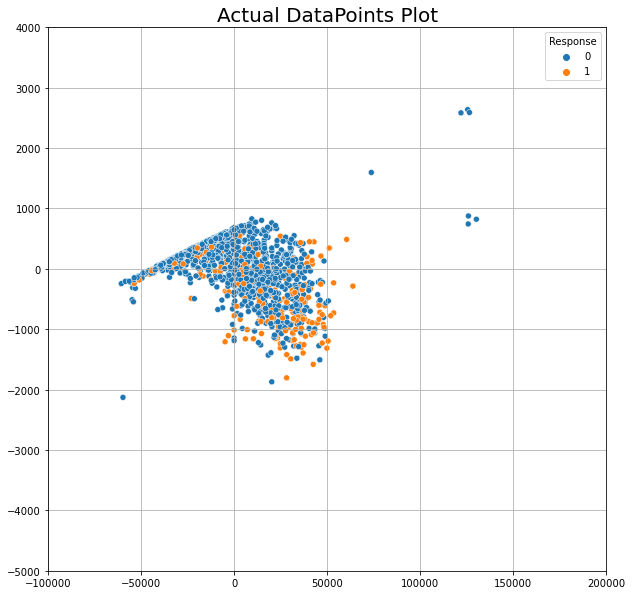

In [26]:
#Plot Of Actual Training Data Points
plt.figure(figsize=(10,10))
plt.grid(True)
plt.title('Actual DataPoints Plot',size=20)
sns.scatterplot(x=z[:1568,0],y=z[:1568,1],hue=y_train)
plt.xlim(-100000,200000);plt.ylim(-5000,4000)

From The plot of actual Data points above: The Datapoint for Response '1' are fewer compared to that of '0'. we may have to oversample the datapoint

<ipython-input-27-5aff2e72eaf9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp['Response']=y_train;data_temp['K_Means']=kmeans.labels_[:train_data.shape[0]]


<AxesSubplot:title={'center':'Corrolation HeatMap'}>

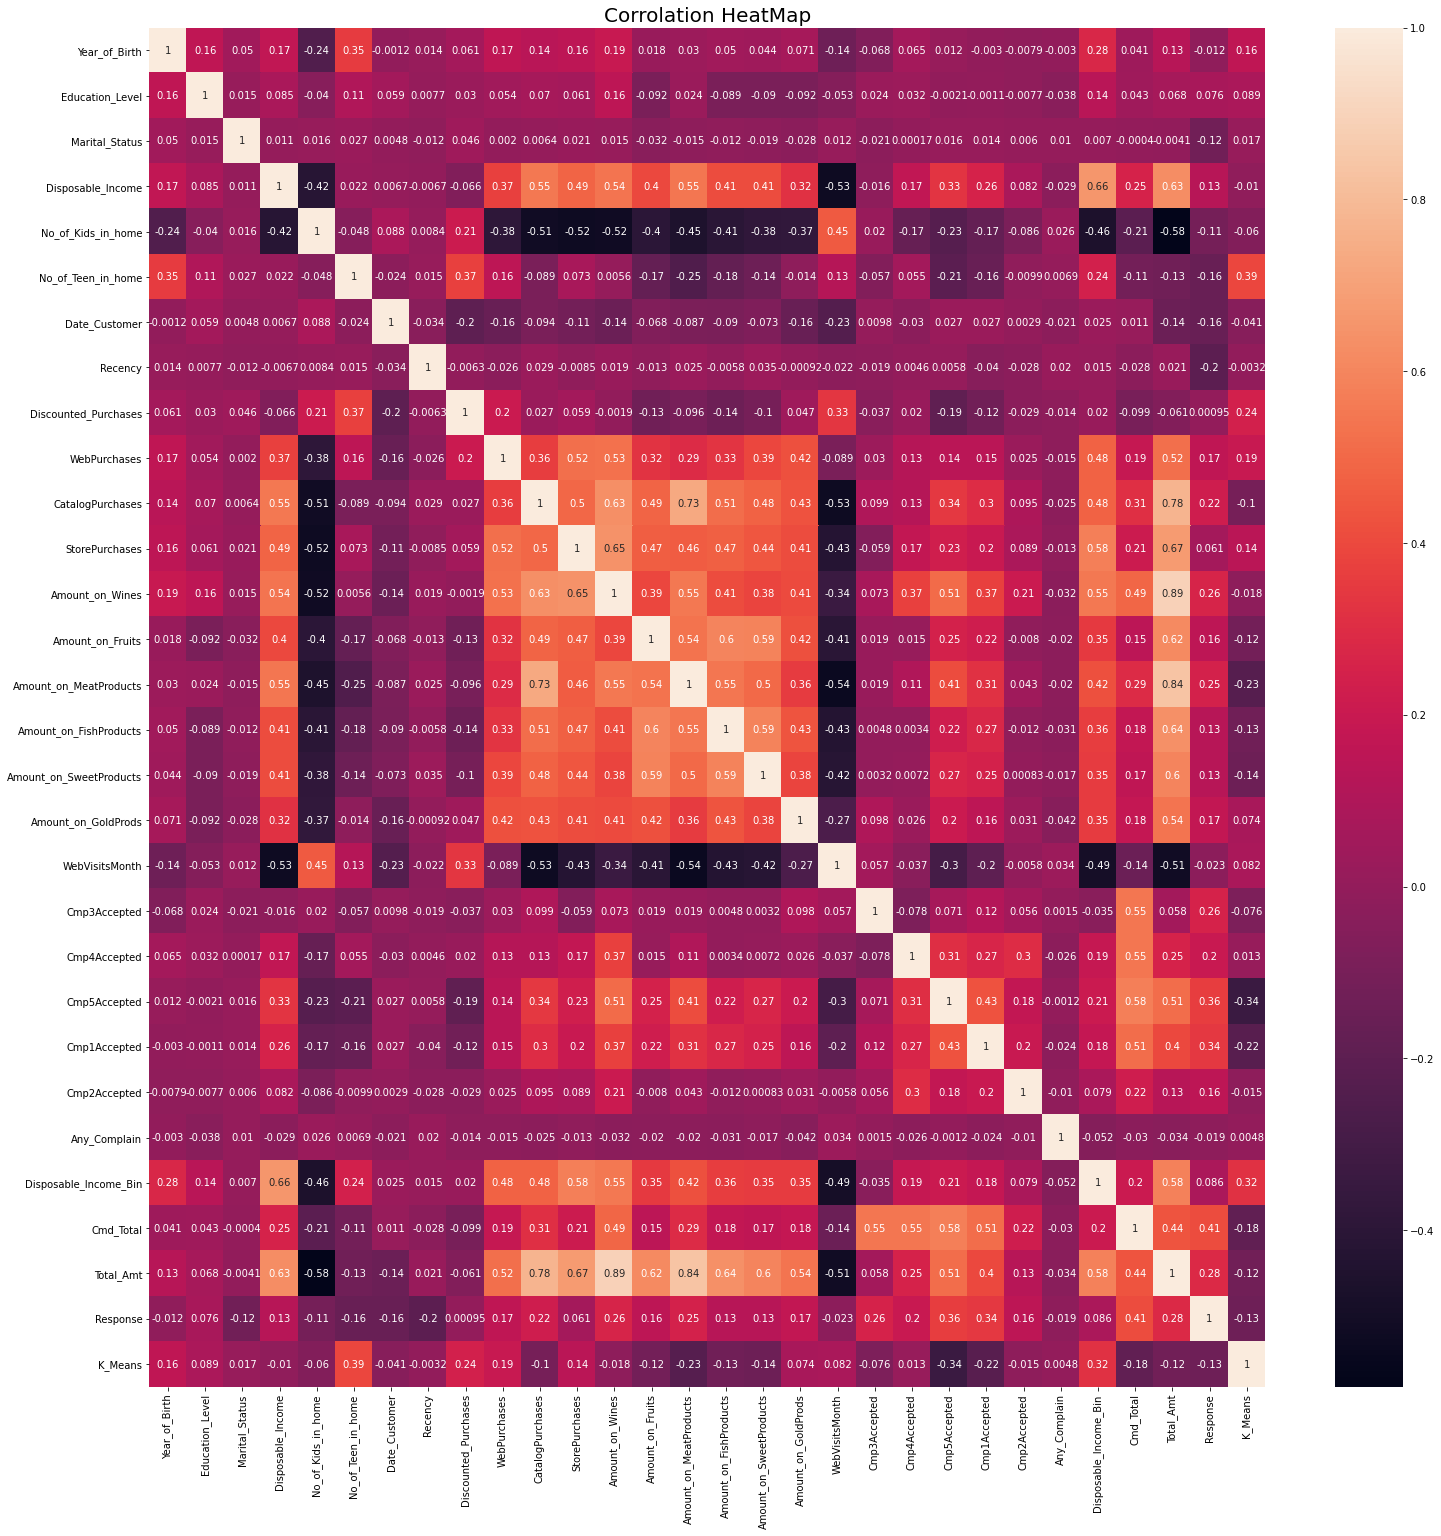

In [27]:
#HeatMap of Data
data_temp=data.iloc[:train_data.shape[0],:]
data_temp['Response']=y_train;data_temp['K_Means']=kmeans.labels_[:train_data.shape[0]]
plt.figure(figsize=(25,25))
plt.grid(True)
plt.title('Corrolation HeatMap',size=20)
sns.heatmap(data_temp.corr(),annot=True)

In [28]:
# Append KMeans_Labels
data['KMeans']=kmeans.labels_
data.head(5)

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Disposable_Income_Bin,Cmd_Total,Total_Amt,KMeans
0,66,2,1,77504.4,1,1,2.455,56,2,1,...,0,0,0,0,0,0,1,0,116,4
1,63,2,3,56784.0,0,1,1.000,17,6,5,...,0,0,0,0,0,0,1,0,422,3
2,59,2,0,103714.8,0,0,1.870,17,0,7,...,0,0,0,1,0,0,1,1,1457,0
3,42,3,0,46311.6,1,0,1.681,49,3,4,...,0,0,0,0,0,0,0,0,185,3
4,62,2,4,87486.0,0,0,2.036,59,1,3,...,0,0,0,1,0,0,1,1,1523,4


### MODEL TRAINING

In [29]:
# Seperating into Train and Test
data_train=data.iloc[:train_data.shape[0],:]
data_test=data.iloc[train_data.shape[0]:,:]
print('Train Data Shape: ',data_train.shape,'\n','Test Data Shape: ',data_test.shape,'\n','Y_Train Shape: ',y_train.shape)

Train Data Shape:  (1568, 29) 
 Test Data Shape:  (672, 29) 
 Y_Train Shape:  (1568,)


In [30]:
data_train.columns

Index(['Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Disposable_Income_Bin', 'Cmd_Total',
       'Total_Amt', 'KMeans'],
      dtype='object')

In [31]:
#OVER SAMPLING THE DATA
over=RandomOverSampler(random_state=42,sampling_strategy=0.95)
data_train,y_train=over.fit_resample(data_train,y_train)
data_train.shape

(2591, 29)

In [32]:
print(data_train.iloc[1])

Year_of_Birth                 63.0
Education_Level                2.0
Marital_Status                 3.0
Disposable_Income          56784.0
No_of_Kids_in_home             0.0
No_of_Teen_in_home             1.0
Date_Customer                  1.0
Recency                       17.0
Discounted_Purchases           6.0
WebPurchases                   5.0
CatalogPurchases               1.0
StorePurchases                 8.0
Amount_on_Wines              205.0
Amount_on_Fruits              22.0
Amount_on_MeatProducts       111.0
Amount_on_FishProducts        50.0
Amount_on_SweetProducts       15.0
Amount_on_GoldProds           19.0
WebVisitsMonth                 6.0
Cmp3Accepted                   0.0
Cmp4Accepted                   0.0
Cmp5Accepted                   0.0
Cmp1Accepted                   0.0
Cmp2Accepted                   0.0
Any_Complain                   0.0
Disposable_Income_Bin          1.0
Cmd_Total                      0.0
Total_Amt                    422.0
KMeans              

In [35]:
data_train.dtypes

Year_of_Birth                int64
Education_Level              int64
Marital_Status               int64
Disposable_Income          float64
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Date_Customer              float64
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
Disposable_Income_Bin         int8
Cmd_Total                    int64
Total_Amt                    int64
KMeans              

In [46]:
print(train_data.iloc[1])

ID                         ID_X28T3VEK
Year_of_Birth                     1958
Education_Level             Graduation
Marital_Status                Together
Disposable_Income              56784.0
No_of_Kids_in_home                   0
No_of_Teen_in_home                   1
Date_Customer               01-08-2013
Recency                             17
Discounted_Purchases                 6
WebPurchases                         5
CatalogPurchases                     1
StorePurchases                       8
Amount_on_Wines                    205
Amount_on_Fruits                    22
Amount_on_MeatProducts             111
Amount_on_FishProducts              50
Amount_on_SweetProducts             15
Amount_on_GoldProds                 19
WebVisitsMonth                       6
Cmp3Accepted                         0
Cmp4Accepted                         0
Cmp5Accepted                         0
Cmp1Accepted                         0
Cmp2Accepted                         0
Any_Complain             

In [151]:
help(SMOTE)

Help on class SMOTE in module imblearn.over_sampling._smote.base:

class SMOTE(BaseSMOTE)
 |  SMOTE(*, sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)
 |  
 |  Class to perform over-sampling using SMOTE.
 |  
 |  This object is an implementation of SMOTE - Synthetic Minority
 |  Over-sampling Technique as presented in [1]_.
 |  
 |  Read more in the :ref:`User Guide <smote_adasyn>`.
 |  
 |  Parameters
 |  ----------
 |  sampling_strategy : float, str, dict or callable, default='auto'
 |      Sampling information to resample the data set.
 |  
 |      - When ``float``, it corresponds to the desired ratio of the number of
 |        samples in the minority class over the number of samples in the
 |        majority class after resampling. Therefore, the ratio is expressed as
 |        :math:`\alpha_{os} = N_{rm} / N_{M}` where :math:`N_{rm}` is the
 |        number of samples in the minority class after resampling and
 |        :math:`N_{M}` is the number of sampl

### DECISION TREE CLASSIFIER

In [24]:
tree_clf=DecisionTreeClassifier(random_state=42)
tree_clf.fit(data_train,y_train)


DecisionTreeClassifier(random_state=42)

In [28]:
import pickle
file_name='trained_model.sav'
pickle.dump(tree_clf,open(file_name, 'wb'))

In [30]:
loaded_model=pickle.load(open('trained_model.sav', 'rb'))

In [31]:
train_data.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,0,6,20,3,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,50,15,19,6,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,29,18,37,2,0,0,0,1,0,0
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,17,24,24,8,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,181,165,203,1,0,0,0,1,0,0


KeyError: 'Total_Amt'

In [53]:
print(data_train['KMeans'].unique())

[4 3 0 1 2]


In [32]:
data_train.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Disposable_Income_Bin,Cmd_Total,Total_Amt,KMeans
0,66,2,1,77504.4,1,1,2.455,56,2,1,...,0,0,0,0,0,0,1,0,116,4
1,63,2,3,56784.0,0,1,1.000,17,6,5,...,0,0,0,0,0,0,1,0,422,3
2,59,2,0,103714.8,0,0,1.870,17,0,7,...,0,0,0,1,0,0,1,1,1457,0
3,42,3,0,46311.6,1,0,1.681,49,3,4,...,0,0,0,0,0,0,0,0,185,3
4,62,2,4,87486.0,0,0,2.036,59,1,3,...,0,0,0,1,0,0,1,1,1523,4


In [40]:
data_train.columns

Index(['Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Disposable_Income_Bin', 'Cmd_Total',
       'Total_Amt', 'KMeans'],
      dtype='object')

In [182]:
tree_grid=DecisionTreeClassifier(random_state=42,max_leaf_nodes=150)
tree_grid.fit(data_train,y_train)


DecisionTreeClassifier(max_leaf_nodes=150, random_state=42)

In [177]:
grid=GridSearchCV(tree_clf,param_grid=[{'min_samples_split':[2,3,5,10],'min_samples_leaf':[2,5,10],'max_leaf_nodes':[30,45,50,60,75,100,120,150,200]}],scoring='f1')

In [178]:
grid.fit(data_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_leaf_nodes': [30, 45, 50, 60, 75, 100, 120, 150,
                                             200],
                          'min_samples_leaf': [2, 5, 10],
                          'min_samples_split': [2, 3, 5, 10]}],
             scoring='f1')

In [179]:
grid.best_params_

{'max_leaf_nodes': 150, 'min_samples_leaf': 2, 'min_samples_split': 2}

### RANDOM FOREST CLASSIFIER

In [190]:
forest_clf=RandomForestClassifier(n_estimators=75,random_state=42,max_leaf_nodes=150,min_samples_leaf=2,min_samples_split=2)
forest_clf.fit(data_train,y_train)

RandomForestClassifier(max_leaf_nodes=150, min_samples_leaf=2, n_estimators=75,
                       random_state=42)

In [189]:
forest_grid=GridSearchCV(forest_clf,param_grid=[{'n_estimators':[2,5,10,50,75,100,120,150,200,300]}],cv=5)
forest_grid.fit(data_train,y_train)
forest_grid.best_params_

{'n_estimators': 75}

In [191]:
forest_grid.best_score_

0.9556222614026082

### Gradient Boosting Classifier

In [156]:
grad_clf=GradientBoostingClassifier(random_state=42)
grad_clf.fit(data_train,y_train)


GradientBoostingClassifier(random_state=42)

In [197]:
grad_grid=GradientBoostingClassifier(random_state=42,max_leaf_nodes=150)
grad_grid.fit(data_train,y_train)


GradientBoostingClassifier(max_leaf_nodes=150, random_state=42)

In [198]:
grad_grid=GridSearchCV(grad_grid,param_grid=[{'n_estimators':[200,300,350,400,500]}],cv=5)
grad_grid.fit(data_train,y_train)
grad_grid.best_params_

{'n_estimators': 500}

In [199]:
grad_grid.best_score_

0.9544617284501676

In [104]:
help(grad_clf)

Help on GradientBoostingClassifier in module sklearn.ensemble._gb object:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a si

In [166]:
# CatBoost Classifier
cat_clf=catboost.CatBoostClassifier()
cat_clf.fit(data_train,y_train)

Learning rate set to 0.0153
0:	learn: 0.6820834	total: 29.6ms	remaining: 29.6s
1:	learn: 0.6706056	total: 32.9ms	remaining: 16.4s
2:	learn: 0.6603558	total: 35.5ms	remaining: 11.8s
3:	learn: 0.6512493	total: 38.2ms	remaining: 9.51s
4:	learn: 0.6416039	total: 40.9ms	remaining: 8.14s
5:	learn: 0.6327052	total: 43.6ms	remaining: 7.23s
6:	learn: 0.6256733	total: 46.1ms	remaining: 6.54s
7:	learn: 0.6187954	total: 48.5ms	remaining: 6.02s
8:	learn: 0.6114777	total: 51.1ms	remaining: 5.62s
9:	learn: 0.6038319	total: 53.6ms	remaining: 5.31s
10:	learn: 0.5977341	total: 56.2ms	remaining: 5.05s
11:	learn: 0.5921917	total: 58.6ms	remaining: 4.82s
12:	learn: 0.5849363	total: 60.9ms	remaining: 4.63s
13:	learn: 0.5781100	total: 63.4ms	remaining: 4.47s
14:	learn: 0.5723205	total: 66.1ms	remaining: 4.34s
15:	learn: 0.5660244	total: 68.7ms	remaining: 4.22s
16:	learn: 0.5597612	total: 71.4ms	remaining: 4.13s
17:	learn: 0.5545344	total: 74.2ms	remaining: 4.05s
18:	learn: 0.5489284	total: 76.9ms	remaining: 

In [203]:
grid=GridSearchCV(cat_clf,param_grid=[{'iterations':[50,100,200,300,500],'depth':[2,4,6,8,12,20,30]}],scoring='f1')
grid.fit(data_train,y_train)
grid.best_score_

Learning rate set to 0.219319
0:	learn: 0.6123994	total: 1.55ms	remaining: 75.9ms
1:	learn: 0.5575497	total: 3.18ms	remaining: 76.3ms
2:	learn: 0.5278036	total: 4.42ms	remaining: 69.3ms
3:	learn: 0.5001356	total: 5.7ms	remaining: 65.6ms
4:	learn: 0.4915924	total: 6.94ms	remaining: 62.5ms
5:	learn: 0.4720672	total: 8.24ms	remaining: 60.4ms
6:	learn: 0.4629306	total: 9.41ms	remaining: 57.8ms
7:	learn: 0.4513543	total: 10.6ms	remaining: 55.7ms
8:	learn: 0.4402384	total: 11.8ms	remaining: 53.6ms
9:	learn: 0.4258978	total: 13ms	remaining: 52ms
10:	learn: 0.4162421	total: 14.2ms	remaining: 50.3ms
11:	learn: 0.4087312	total: 15.5ms	remaining: 49ms
12:	learn: 0.4033055	total: 16.7ms	remaining: 47.5ms
13:	learn: 0.3966672	total: 17.9ms	remaining: 46.1ms
14:	learn: 0.3886369	total: 19.2ms	remaining: 44.7ms
15:	learn: 0.3845849	total: 20.4ms	remaining: 43.4ms
16:	learn: 0.3821665	total: 21.8ms	remaining: 42.3ms
17:	learn: 0.3793352	total: 23ms	remaining: 40.9ms
18:	learn: 0.3769571	total: 24.5ms	

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\Anaconda3\lib\site-packages\catboost\core.py", line 4717, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\DELL\Anaconda3\lib\site-packages\catboost\core.py", line 2021, in _fit
    train_params = self._prepare_train_params(
  File "C:\Users\DELL\Anaconda3\lib\site-packages\catboost\core.py", line 1953, in _prepare_train_params
    _check_train_params(params)
  File "_catboost.pyx", line 5831, in _catboost._check_train_params
  File "_catb

Learning rate set to 0.02921
0:	learn: 0.6617925	total: 109ms	remaining: 54.6s
1:	learn: 0.6336265	total: 226ms	remaining: 56.4s
2:	learn: 0.6066959	total: 340ms	remaining: 56.4s
3:	learn: 0.5800345	total: 459ms	remaining: 56.9s
4:	learn: 0.5559642	total: 577ms	remaining: 57.1s
5:	learn: 0.5361599	total: 593ms	remaining: 48.8s
6:	learn: 0.5146609	total: 720ms	remaining: 50.7s
7:	learn: 0.4950241	total: 829ms	remaining: 51s
8:	learn: 0.4755548	total: 953ms	remaining: 52s
9:	learn: 0.4580714	total: 1.06s	remaining: 52.2s
10:	learn: 0.4406061	total: 1.18s	remaining: 52.5s
11:	learn: 0.4294105	total: 1.19s	remaining: 48.2s
12:	learn: 0.4140553	total: 1.31s	remaining: 49.1s
13:	learn: 0.3992538	total: 1.43s	remaining: 49.5s
14:	learn: 0.3861308	total: 1.55s	remaining: 50s
15:	learn: 0.3735191	total: 1.66s	remaining: 50.3s
16:	learn: 0.3616012	total: 1.78s	remaining: 50.7s
17:	learn: 0.3497445	total: 1.9s	remaining: 50.9s
18:	learn: 0.3389638	total: 2.02s	remaining: 51.1s
19:	learn: 0.328701

0.9648178230422587

In [200]:
#Classification Report
cv=cross_val_predict(grad_clf,data_train,y_train,cv=5)
print(classification_report(cv,y_train))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1215
           1       0.96      0.88      0.92      1376

    accuracy                           0.92      2591
   macro avg       0.92      0.92      0.92      2591
weighted avg       0.92      0.92      0.92      2591



In [201]:
submission(grad_grid,'7_grad_grid_500est_over0.95.csv')

,ID,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,1
4,ID_GOVUZ545,0
...,...,...
667,ID_1D68PV28,0
668,ID_TM6CYFZO,0
669,ID_VHR666SC,0
670,ID_O852YAO1,0


In [44]:
# Writing File to csv
def submission(clf,filename):
    sub_file=pd.DataFrame()
    sub_file['ID']=sample_sub['ID']
    sub_file['Response']=clf.predict(data_test)
    sub_file.to_csv(r'C:\Users\DELL\Documents\Dsn 2021 sub files\\' +filename,index=False)
    return(sub_file)

In [194]:
sample_sub

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN
...,...,...
667,ID_1D68PV28,NaN
668,ID_TM6CYFZO,NaN
669,ID_VHR666SC,NaN
670,ID_O852YAO1,NaN


In [258]:
grad_grid=GridSearchCV(grad_clf,param_grid=[{'n_estimators':[2,5,10,50,75,100,120,150,200,300],'min_samples_split':[2,3,5,10,20,50,100],'min_samples_leaf':[2,5,10,20,50],'max_leaf_nodes':[2,5,10,20]}],scoring='f1')

In [238]:
help(sklearn.model_selection.RandomizedSearchCV)

Help on class RandomizedSearchCV in module sklearn.model_selection._search:

class RandomizedSearchCV(BaseSearchCV)
 |  RandomizedSearchCV(estimator, param_distributions, *, n_iter=10, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=nan, return_train_score=False)
 |  
 |  Randomized search on hyper parameters.
 |  
 |  RandomizedSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated search over parameter settings.
 |  
 |  In contrast to GridSearchCV, not all parameter values are tried out, but
 |  rather a fixed number of parameter settings is sampled from the specified
 |  distributions. The number of parameter settings that are tried is
 |  

In [31]:
from sklearn.svm import SVC
model_svc = SVC (C=100, kernel= 'rbf')
model_svc.fit(data_train, y_train)

SVC(C=100)

In [32]:
y_pred = model_svc.predict(data_test)

In [35]:
c

In [65]:
data2.to_csv("DSN_SUBMISSION.CSV", index=False)

In [62]:
forest_clf=RandomForestClassifier(random_state=42,n_estimators=50,max_leaf_nodes=350,min_samples_leaf=10,min_samples_split=2)
forest_clf.fit(data_train,y_train)

RandomForestClassifier(max_leaf_nodes=350, min_samples_leaf=10, n_estimators=50,
                       random_state=42)

In [63]:
y_pred = forest_clf.predict(data_test)

In [66]:
data3 = pd.DataFrame({"ID":test_data['ID'], "Response": y_pred})

In [67]:
data3.to_csv("DSN_SUBMISSION1.CSV", index=False)

In [57]:
from sklearn.svm import LinearSVC
lin_clf=LinearSVC(random_state=42)
lin_clf.fit(data_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=42)

In [58]:
from sklearn.metrics import f1_score

In [59]:
y_pred=lin_clf.predict(data_train)

In [60]:
f1_score(y_train,y_pred)

0.6580132450331126

In [139]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [140]:
x_train_scaled=scaler.fit_transform(data_train.astype(np.float32))

In [141]:
x_test_scaled=scaler.transform(data_test.astype(np.float32))

In [142]:
lin_clf=LinearSVC(random_state=42)

In [143]:
lin_clf.fit(x_train_scaled,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=42)

In [144]:
y_pred=lin_clf.predict(x_train_scaled)

In [145]:
f1_score(y_train,y_pred)

0.5846153846153845

In [147]:
y_pred=lin_clf.predict(x_test_scaled)

In [148]:
data2 = pd.DataFrame({"ID":test_data['ID'], "Response": y_pred})

In [149]:
data2.to_csv("DSN_SUBMISSION5.CSV", index=False)

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [110]:
param_distributions = {"gamma": reciprocal (0.001,0.1), "C": uniform (1,10)}

In [177]:
from sklearn.svm import SVC

In [178]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [180]:
svm_clf = SVC(gamma="scale")

In [181]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(train_data[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   0.0s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   0.0s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   0.0s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   0.0s


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 169, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  File "C:\

[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   0.0s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   0.0s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   0.0s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   0.0s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   0.0s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   0.0s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   0.0s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   0.0s
[CV] END ....C=7.011150117432088, gamma=0.026070247583707663; total time=   0.0s
[CV] END ....C=7.011150117432088, gamma=0.026070247583707663; total time=   0.0s
[CV] END ....C=7.011150117432088, gamma=0.026070247583707663; total time=   0.0s
[CV] END .....C=1.2058449429580245, gamma=0.0870602087830485; total time=   0.0s
[CV] END .....C=1.2058449429

ValueError: could not convert string to float: 'ID_4A9AR6FQ'

In [182]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [183]:
x_train_scaled=scaler.fit_transform(data_train.astype(np.float32))

In [184]:
x_test_scaled=scaler.transform(data_test.astype(np.float32))

In [185]:
lin_clf=LinearSVC(random_state=42)

In [186]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(x_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...C=7.118528947223795, gamma=0.0019010245319870352; total time=   0.2s
[CV] END ...C=7.118528947223795, gamma=0.0019010245319870352; total time=   0.0s
[CV] END ...C=7.118528947223795, gamma=0.0019010245319870352; total time=   0.0s
[CV] END ...C=3.9214464853521815, gamma=0.005404103854647327; total time=   0.0s
[CV] END ...C=3.9214464853521815, gamma=0.005404103854647327; total time=   0.0s
[CV] END ...C=3.9214464853521815, gamma=0.005404103854647327; total time=   0.0s
[CV] END ......C=5.56069984217036, gamma=0.03718364180573207; total time=   0.0s
[CV] END ......C=5.56069984217036, gamma=0.03718364180573207; total time=   0.0s
[CV] END ......C=5.56069984217036, gamma=0.03718364180573207; total time=   0.0s
[CV] END ....C=2.996737821583597, gamma=0.010677482709481347; total time=   0.0s
[CV] END ....C=2.996737821583597, gamma=0.010677482709481347; total time=   0.0s
[CV] END ....C=2.996737821583597, gamma=0.010677

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001989ACED640>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001989ACB2AC0>},
                   verbose=2)

In [187]:
rnd_search_cv.best_estimator_

SVC(C=3.9214464853521815, gamma=0.005404103854647327)

In [188]:
rnd_search_cv.best_score_

0.8879957802113491

In [189]:
rnd_search_cv.best_estimator_.fit(x_train_scaled, y_train)

SVC(C=3.9214464853521815, gamma=0.005404103854647327)

In [190]:
y_pred = rnd_search_cv.best_estimator_.predict(x_test_scaled)

In [191]:
data2 = pd.DataFrame({"ID":test_data['ID'], "Response": y_pred})

In [192]:
data2.to_csv("DSN_SUBMISSION6.CSV", index=False)